# Section 1


# What Is A Signal


<img src="sine_wave_sampled.gif?2" width="75%">

In [16]:
import numpy 
from numpy import pi
from scipy import fft, linalg, signal 
from scipy import stats, io

from ipywidgets import *

from datetime import datetime

import matplotlib.pyplot as plt

%matplotlib notebook

In [18]:
print(datetime.now())

2021-09-14 17:35:06.803933


## What Is A Signal


  + Something that carries or conveys information

  + What does that even mean?

  + That is about anything?

  + This is so general it maybe useless, maybe

## Examples of Signals

#### Sound
    + Acoustic waves
    + Humans hear between 20Hz to 20 KHz
    
  
  <img src="Theme_Classic.png" width="65%" />
  
 https://www.audacityteam.org/

### Sea Levels



<img src="NASA-Satellite-sea-level-rise-observations.jpg" width="40%" />

+ https://climate.nasa.gov/vital-signs/sea-level/

+ https://en.wikipedia.org/wiki/Sea_level_rise


### Stock Prices
 [Game Stop 1 year](https://www.google.com/finance/quote/GME:NYSE?sa=X&sqi=2&ved=2ahUKEwiOzfqbxP_yAhWfQ_EDHVQZDgQQ3ecFegQILhAS&window=1Y)
     
<img src="GameStopStock.png?1" width="55%">

#### Sun Spots

<img src="Sunspots_1302_Sep_2011_by_NASA.jpg" width="85%" >

https://en.wikipedia.org/wiki/Sunspot


#### Sun Spots over time
   
<img src="Sunspot_Numbers.png" width="100%" >

#### Gravity Waves
  + Surface waves
  + Sea waves
  + Eeathquakes
  

https://en.wikipedia.org/wiki/Wake

<img src="duck_wake.jpg" width="100%">

#### Gravitational Waves

+ Find Black Holes combining
+ 1 Billion dollar detector

<img src="1280px-LIGO_Hanford_aerial_05.jpg" width="50%" >

[http://svs.gsfc.nasa.gov/](http://svs.gsfc.nasa.gov//vis/a010000/a010500/a010543/WhtDwrfCollid_ProRes_720x486_59.94fps.webmhd.webm)



+ 2017 Nobel prize



<img src="ns_gw_art.jpg" width="75%">

https://www.ligo.caltech.edu/page/what-are-gw

https://en.wikipedia.org/wiki/Gravitational-wave_observatory


#### Electrical
  + Probably what everyone things of
  + It's all electrical signals at some point
  + Voltage or current changing in
    + Time
    + Node
    + position

<img src="Scope.jpeg" width="100%">

##### Light
  + Cameras
  + Light level



  + Radio Waves
    + FM Radio
    + Radar
    + Radio Astronomy 
    

##### Radar
  + Detecting aircraft, ships, ...
  + Automotive distance sensing
  + Imaging Astreroids
    + Beyond the ability of optical telescopes
    + Each image ~2Km square
    + ~20X Earth-Moon distance



https://www.jpl.nasa.gov/news/nine-radar-images-of-asteroid-2007-pa8

<img src="astro_sar_img.jpg" width="100%">

#### Radio Astronomy

<img src="USA.NM.VeryLargeArray.02.jpg" width="100%">

https://en.wikipedia.org/wiki/Very_Large_Array


https://public.nrao.edu/telescopes/vla/

#### Examples of Signals

  + Sound
  + Sea Level
  + Stock Prices
  + Sun Spots
  + Gravity Waves
  + Electrical 
  + Electromagnetic waves
    + Light
    + Radio Waves
    + Communications
    + Radar
    + 
    

##  Basic RF problems

#### Communication
  + Getting data between places

#### Radar
  + Using radio waves to sense something

#### Passive Inference
  + Using Emotions that already exist what can I figure out

## Continuous vs Discrete Signals


  + Analog to Digital Conversion
  + Digital to Analog Conversion
  + $\delta $ (Delta) Function
  + Nyquest Sampling





<img src="sine_wave_sampled.gif?0" width="100%">

### Continuous

  + Defined at every point
  + 

### Discrete

  + Series of values
  + 

### Sampling

  + Analog to Digital Conversion
  
 $$ S[n] = \sum_{i}^{-\infty \dots \infty} s(t) \cdot \delta(t-i) $$
 
 <img src="pulse_train.png?1" width="100%">



#### $ \delta $ (Delta) Function

$$ \delta (t) = \Big \{ \begin{matrix} \infty \: :\quad t=0 \\ \: 0 : \quad otherwise \end{matrix} $$

$$ 1 = \int_{-\infty}^{\infty} \delta(t) \: dt $$




### Nyquist

  + Sampling two or more times faster than the bandwidth of the signal
  + Critera for signal recovery
  + Often systems operate faster

<img src="1920px-Aliasing-folding_SVG.svg.png" width="100%">

[https://en.wikipedia.org/wiki/Nyquist_frequency](https://en.wikipedia.org/wiki/Nyquist_frequency)

### Time Series
  + Sampled at a regular times
  + Identical Sampling

<img src="sine_wave_sampled.gif?0" width="100%">

<IPython.core.display.Javascript object>


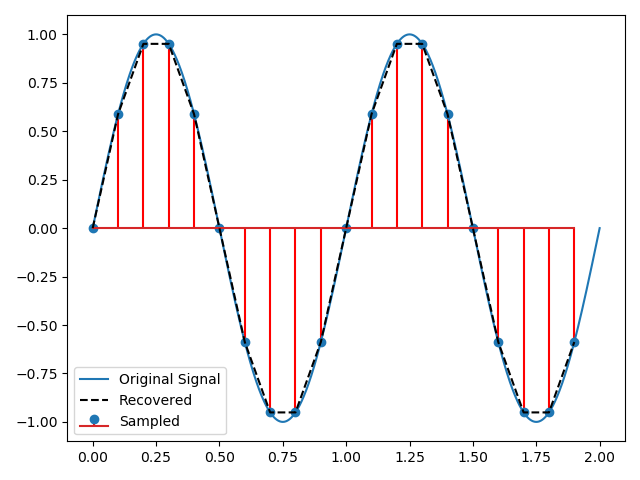

interactive(children=(FloatSlider(value=10.0, description='sample_rate', max=25.0, min=1.0), FloatSlider(value…

In [159]:
t, sample_rate, frequency, phase = numpy.linspace(0, 2, 1001), 10, 1, 0
signal = lambda t, f=1., phi=0: numpy.sin(2*pi*t*f+phi)

fig, ax = plt.subplots()

@interact(sample_rate=(1,25, 0.1), frequency=(-9,10, 0.1), phase=(-6, 6, 0.1))
def sampled_sinwave(sample_rate=sample_rate, frequency=frequency, phase=0.):
    ax.cla()
    t_samples = numpy.arange(min(t), max(t), 1./sample_rate)
    x, x_sampled = signal(t, frequency, phase), signal(t_samples, frequency, phase)
    ax.plot(t, x, label='Original Signal')
    ax.stem(t_samples, x_sampled, linefmt='r', label='Sampled', use_line_collection=True)
    ax.plot(t_samples, x_sampled, '--k', label='Recovered')
    ax.legend(loc='lower left')
    fig.canvas.draw_idle()
    fig.tight_layout()

##  Kinds of basic RF problems

#### Communication
  + Getting data between places

#### Radar
  + Using radio waves to sense something

#### Passive Inference
  + Using Emotions that already exist what can I figure out

## What Signals We Are Considering



## Time Series
  + Sampled at a regular

#### Radio Signals
  + Can we capture it we a Software Defined Radio (SDR)
  + Complex valued (pair of reals)

### Single Channel
  + 1 dimension to each sample

### Narrowband
  + Bandwidth of the signal is smaller than it's center frequency
  

## Properties of Operations on Signals (Systems)
  + Linearity
  + Time Inverance 
  + Bounded Input Bounded Output
  + Dirivatives and Differences
  + Integrates and Sumations 
  + Useful Non-linear Functions
    + ABS
    + Squared
    + Distance
    + Log and Decibels

### Linearity

  + Additivity
$$ f(a+b) = f(a) + f(b) $$



  + Homogeneity 
$$ f(\alpha \: x) = \alpha \: f(x) $$



  + Approximately linear
  
    + Useful approximation
    
    + For b << a $f(a+b)$ can be treated as linear
    
    $$ f(a+b) \approx f(a) + f(b) \quad for \:\: b << a $$

#### Linear ?
Is the function linear, non-linear, Approximately linear?
  
  1.  
  
  $$ f(x) = 3 \cdot x $$

  2. 
  
  $$ f(x) = 0 \cdot x $$

  3. 
  
  $$ f(x) = 2 \cdot x+1 $$

  4. 
  
  $$ f(x) = x^{2} $$

### Time Inverance

  + Function or System not dependent on what time it is
  
  $$ y(t) = f(x, t) = f(x, t+a) \quad for \: any \: a $$

#### Time Inverent ?

  1. 
  
  $$ f(x) = 10 \cdot x $$

  2. 
  $$ f(x) = x^{2} + 2x + 1 $$

 3. 
    $$ f(x) = t \cdot x $$

  4. 
  $$ f(x) = x * \delta(t-1) $$
  
    + What is that symbol "$*$" ? 
    + What about that other symbol "$\delta$"?

###  Bounded Input Bounded Output

  + For any input of limited energy the output energy is limited
  
$$ \int_{- \infty}^{\infty} | \: f(x) \:  | \: dt \: < \: \infty  \quad  for \: \int_{- \infty}^{\infty} | \: x \:  | \: dt < \infty$$

#### BIBO System?

1. 
$$ f(x) = 5 \cdot x + 2 $$

  2. 
  $$ f(x) = x^2 $$

  3. 
  $$ f(x) =  \cfrac{1}{x} $$

  4. 
  $$ f(x) = \int_{-\infty}^{t} x^{2}(\tau) \: d \tau $$

### Dirivatives and Differences

#### Dirivative
The rate of chage with respect to another variable.

# Insert Dirivative Graphic

## Random Varaibles
  + Basics of Probablilty
    + Total Probablilty
    + Probability Density Function
    + Cumulative Distribution Function
  + Continuous Vs. Discrete
  + Common Distributions
      + Uniform
      + Exponential
      + Gaussian
      + Chi Squared
  + Mean, Variance, and higher Moments
  


  + Random Variables
  + Central Limit Theorem
  + Operations on random variables
  + Correlation
  + Conditional Probability 
  + Independent and identically Distributed 

## Source of Noise

#### Thermal Noise

$$ P = k_B \cdot T \cdot BW $$

  + $k_B$ is [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant)
  + $T$ is Temperature in [Kelvin](https://en.wikipedia.org/wiki/Kelvin)
  + $BW$ is the bandwidth in Hz
  
#### System Noise

  + Like thermal noise

### Basics Probability

  
  <img src="probability.png?1" width="75%" >

#### Total Probability
    + Sum of all included outcomes is 1
    
 
 <img src="probability_total.png?1" width="75%" >

#### Probability of 1?
Given a random number generator what are the odd's it will return 1?

<img src="probability_point.png?1" width="75%" >



#### Probability less than 0

<img src="probability_regoin.png?1" width="75%">

### Probability Density Function

  <img src="probability.png?1" width="75%" >

### Cumulative Density Function

<img src="probability_pdf_cdf.png?1" width="65%">

### Statistical Moments 
$$ \bf x \sim \mathcal{\bf P} \: \quad \: P(x)= \cdots $$

##### Total Probabilty
$$ 1 =  \int_{-\infty}^{\infty} P(x) dx \\= \sum P(x_i)$$

##### Mean
$$ \mu = E(\bf X) =  \int_{-\infty}^{\infty} xP(x) dx \\= \sum x_i P(x_i)$$



##### Variance
$$ \sigma^2 = Var(\bf X) =  \int_{-\infty}^{\infty} (x-\mu)^2 P(x) dx \\= \sum (x_i-\mu)^2 P(x_i)
$$

##### Skew
$$ Skew(\bf X) =  \int_{-\infty}^{\infty} \left ( \cfrac{x-\mu}{\sigma} \right )^3 P(x) dx \\= \sum \left ( \cfrac{x-\mu}{\sigma} \right )^3 P(x_i)
$$
#### Excess Kurtosis
$$ Kurt(\bf X) =  \int_{-\infty}^{\infty} \left ( \cfrac{x-\mu}{\sigma} \right )^4 P(x) dx \\= \sum \left ( \cfrac{x-\mu}{\sigma} \right )^4 P(x_i)
$$



### Information


##### Entropy 

$$ H(\bf X) = -\int_{-\infty}^{\infty} P(x) ln \left ( P(x) \right ) dx \\= -\sum P(x) ln \left ( P(x) \right )
$$

### Continuous 
+ Likelihood function
  + Non-negative
  + Can be greater than 1
  + Probability density Function (PDF)

<img src="probability.png?2" width="90%" >

### Discrete

+ Likelihood function
  + Non-negative
  + 0 or +infinity 
+ Probability Mass Function (PMF)
  
  
<img src="probability_mass_function.png?1" width="90%">

#### Common Distributions
  + Uniform 
    + Eazist to work with
    + Computers likely start with this
  + Exponential
    + Eazy to work with
  + Gaussian
    + The most common
  + Chi Squared
    + Most common squared
    

<img src="common_distributions.png?1" width="100%">

#### Uniform
$$ P(x) =\Big \{ \begin{matrix} \:1 \: :\quad 0\leq x \leq 1 \\0 : \quad otherwise \end{matrix}$$


$$ \Phi (x) = \Big \{ \begin{matrix} \:x \: :\quad 0\leq x \leq 1 \\0 : \quad otherwise \end{matrix} $$

$$ Mean = \cfrac{1}{2}, \quad 
Var = \cfrac{1}{12(1-0)^2}, \quad \\
Skew = 0, \quad
kurtosis = \cfrac{-6}{5}, \quad \\
Entropy = ln(1-0)
$$


<img src="uniform_distributions.png?1" width="100%">


#### Exponetial

$$ P(x) =\Big \{ \begin{matrix} \: \lambda e^{-\lambda x} \: :\quad 0\leq x \\0 \quad : \quad otherwise \end{matrix}$$

$$ \Phi (x) = \Big \{ \begin{matrix} \: 1-e^{-\lambda x} \: :\quad 0\leq x  \\0 : \quad otherwise \end{matrix} $$

$$ Mean = \cfrac{1}{\lambda}, \quad 
Var = \cfrac{1}{\lambda^2}, \quad \\
Skew = 2, \quad
kurtosis = 6, \quad \\
Entropy = 1- ln(\lambda)
$$



<img src="expon_distributions.png?0" width="100%">

### 

#### Gaussian

$$ P(x) = \cfrac{1}{\sigma \sqrt{2 \pi}} 
\: e^{ \cfrac{1}{2} \left(\cfrac{x-\mu}{\sigma} \right )^{2} }$$

$$ \Phi (x) = \cfrac{1}{2} \left ( 1 + erf \left ( \cfrac{x-\mu}{\sigma \sqrt{2}} \right ) \right )
$$

$$ Mean = \mu, \quad 
Var = \sigma^2, \quad \\
Skew = 0, \quad
kurtosis = 0, \quad \\
Entropy = \cfrac{1}{2} \left( ln \left (
2 \pi \sigma^2 
\right ) + 1 \right )
$$

<img src="gaussian_distributions.png" width="100%">

#### $\chi ^ 2$  (Chi Squared)

$$ \chi ^ 2 (x) \quad = \quad \Bigg \{ \begin{matrix} \:
\cfrac{ x^{k/2 - 1 } \: e^{-x}}{2^{k/2}\: \Gamma(k/2)}
\: :\quad 0\leq x \\0 \quad\quad : \quad otherwise \end{matrix}
$$



[The chi-squared distribution is obtained as the sum of the squares of k independent, zero-mean, unit-variance Gaussian random variables](https://en.wikipedia.org/wiki/Chi-squared_distribution)



<img src="chi2_distributions.png" width="100%">

<img src="chi2_order_distributions.png?1" width="100%">

<img src="chi2_order_distributions.gif?2" width="100%">

## Central Limit Theorem

  + The linear combination of independent random variable to Gaussian in the limit
  
  + The reason Gaussian is the most important distribution
  

#### Linear Operations 



<IPython.core.display.Javascript object>


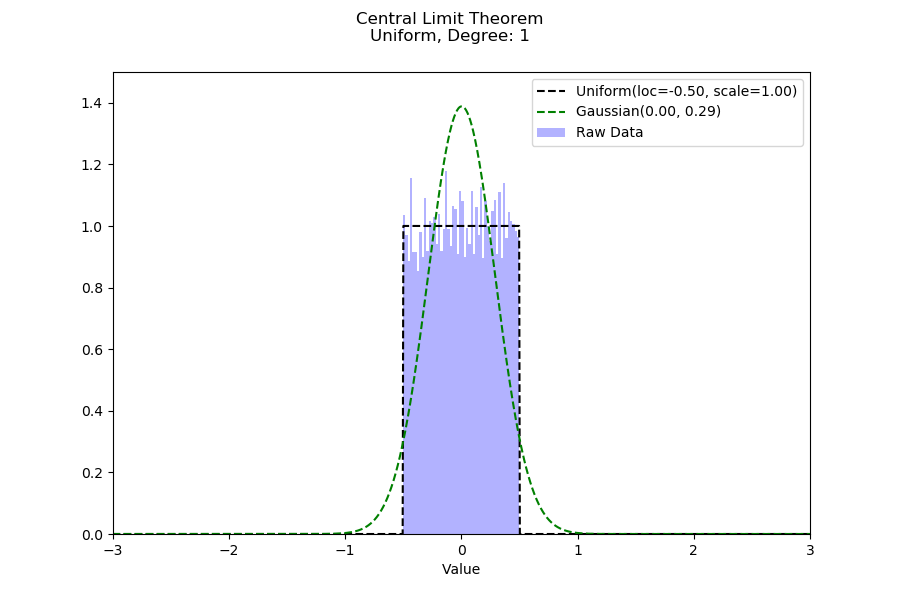

interactive(children=(IntSlider(value=1, description='n', max=64, min=1), Output()), _dom_classes=('widget-int…

In [164]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(9, 6)

def operation(rv, n):
    return numpy.sum(rv, axis=1)/numpy.sqrt(n)

@interact(n=(1, 64, 1))
def central_limit_widget(n=1, ):
    number_samples = 10_000
    x = numpy.linspace(-3, 3, 1001)
    rv = 1*(stats.uniform.rvs(size=(int(number_samples),n))-0.5)
    rv = operation(rv, n)
    ax.cla()
    _ = plt.hist(rv, 50, density=True, facecolor='b', alpha=0.3, label='Raw Data')
    ax.set_xlim((min(x), max(x)))
    ax.set_ylim((0, 1.5))
    fig.suptitle(f'Central Limit Theorem\nUniform, Degree: {n}')
    ax.set_xlabel('Value')
    # Fit Uniform
    loc, scale = stats.uniform.fit(rv)
    p_x_uniform = stats.uniform.pdf(x, loc=loc, scale=scale)
    ax.plot(x, p_x_uniform, '--k', label=f'Uniform(loc={loc:.2f}, scale={scale:.2f})')
    # Fit Gaussian
    mu, sigma = stats.norm.fit(rv)
    p_x_uniform = stats.norm.pdf(x, loc=mu, scale=sigma)
    ax.plot(x, p_x_uniform, '--g', label=f'Gaussian({mu:.2f}, {sigma:.2f})')
    ax.legend()

### Operations on Random Variables

#### Shifts, Scalings, Abs, and Squared

#### Addition of two RV's

Convolve the PDF's 

+ Sorry for the recycled plots

<img src="rect_rect_conv_auto.gif" width="100%">

<img src="rect_exp_conv_auto.gif" width="100%">

<img src="exp_exp_conv_auto.gif" width="100%">

<img src="rect_gaussian_conv_auto.gif" width="100%">

<img src="gaussian_gaussian_conv_auto.gif" width="100%">

    
## Basic Linear Algebra
  + Vector Operations
    + Addition
    + Scaler Multiplication
    + Vector Dimension Span
  + Vector Products
    + Elementwise Product
    + Outter Product
    + Inner Product
    

+ Cauchy–Schwarz inequality
+ Matched Filter
+ Convolution
+ Matrix Operations
+ Multivariate Random Variables
+ Correlation of random vectors
+ Orthogonal + Normal = Orthonormal
+ Inverse
+ Decomposistions

## What is a Vector


$$  \vec{V} \quad = \quad [\:v_1, \:v_2, \: _\cdots, \: v_n ] $$

+ List of numbers with associated operations
  + Direction and magnitude
+ Often thought of as spacial
  + Does not have to be ...
+ Associated Operations
  + More than \( Add, Subtract, Multiply, Divide \)






<img src="vector.png?3" width="75%">

### Where to get a vector?

##### Look in the Time Series
Want a n-D vector of data, grab n-samples of a time series at time t.

#####  Bored of that data
Grab n-samples at t+1

### Vector Addition

$$ \vec{U} = \vec{V} + \vec{W} $$

$$ \begin{matrix}
\; \quad \vec{V} \quad = \quad [\:v_1, \:v_2, \: _\cdots, \: v_n ] \\
+ \quad \vec{W} \quad = \quad [\:w_1, \:w_2, \: _\cdots, \: w_n ] \\ \hline
\quad \vec{U} \quad = \quad [\:u_1, \:u_2, \: _\cdots, \: u_n ]
\end{matrix}
$$

$$
u_1=v_1+w_1 \: , \: u_2=v_2+w_2 \: , \: _\cdots \: , \: u_n=v_n+w_n 
$$

+ Dimentions of each vector?



<img src="vector_addition.png?1" width="85%">

<IPython.core.display.Javascript object>


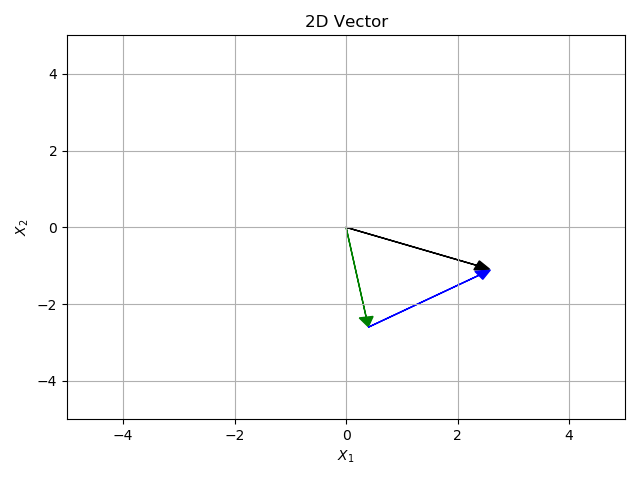

interactive(children=(FloatSlider(value=1.0, description='v1', max=5.0, min=-5.0), FloatSlider(value=2.0, desc…

In [163]:
fig, ax = plt.subplots()


@interact(v1=(-5,5,0.1), v2=(-5,5,0.1), w1=(-5,5,0.1), w2=(-5,5,0.1))
def update(v1=1, v2=2, w1=2, w2=0.5):
    ax.cla()
    u1, u2 = v1+w1, v2+w2
    ax.arrow(0, 0, v1*0.9, v2*0.9, head_width=0.25, head_length=0.25, fc='g', ec='g')
    ax.arrow(v1, v2, w1*0.9, w2*0.9, head_width=0.25, head_length=0.25, fc='b', ec='b')
    ax.arrow(0, 0, u1*0.9, u2*0.9, head_width=0.25, head_length=0.25, fc='k', ec='k')
    fig.canvas.draw_idle()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title('2D Vector')
    plt.grid(True)
    fig.tight_layout()

### Scalar Vector Multiplication

$$  \alpha \vec{V} \quad = \quad [\:\alpha\:  v_1, \:\alpha\: v_2, \: _\cdots, \: \alpha\: v_n ] $$


+ Changes Magnitude
+ Does not change direction
  + Can flip if $\alpha$ is negative

<img src="vector_span.png" width="75%">

### Dimension and Span

+ How many dimentions does a vector occupy?

+ How much of that space can that vector reach?

+ What is the Volume?

<img src="vector_span.png" width="75%">

+ What about 2 vectors?

### Vector Multiplication

+ Elementwise


+ Outter product


+ Inner (Dot) product



<img src="vector_multhing.png" width="100%">

This kind of funny?

#### Elementwise


  + Multiply each respective element
    + Store then in the respective place
  + Requires vectors be same size
  + First one thinks off
    + After scalar


$$ \vec{W} \odot \vec{V} = \quad = \quad [\:v_1 \: w_1, \:v_2 \: w_2, \: _\cdots, \: v_n \: w_n ] $$


#### Outer Product



+ Returns a Matrix

+ Directions of rows and columns?
  + Think span and scalar multiplication
 

$$ \vec{W} \otimes \vec{V} \quad  = \quad \begin{bmatrix} 
    \:v_1 \: w_1 &\:v_2 \: w_1 &  \dots & v_n \: w_1 \\
    \:v_1 \: w_2 &\:v_2 \: w_2 &   \\
    \vdots & & \ddots & \vdots \\
    \:v_1 \: w_m & v_2 \: w_m &  \dots & v_n \: w_m\\
    \end{bmatrix}
$$


### Inner (Dot) Product

$$ \vec{V} \cdot \vec{W} = \quad = \quad \:v_1 \: w_1 +  \:v_2 \: w_2 + \: _\cdots + \: v_n \: w_n  $$

+ Sum of the elementwise multiplication
+ Requires vectors are the same size
+ $\vec{V} \cdot \vec{V} = {|\vec{V}|}^2$

+ Most useful of all the vector products

+ Sometimes called production if one vector is unit length

<img src="1280px-Dot_Product.svg.png" width="75%">

https://en.wikipedia.org/wiki/Dot_product

<IPython.core.display.Javascript object>


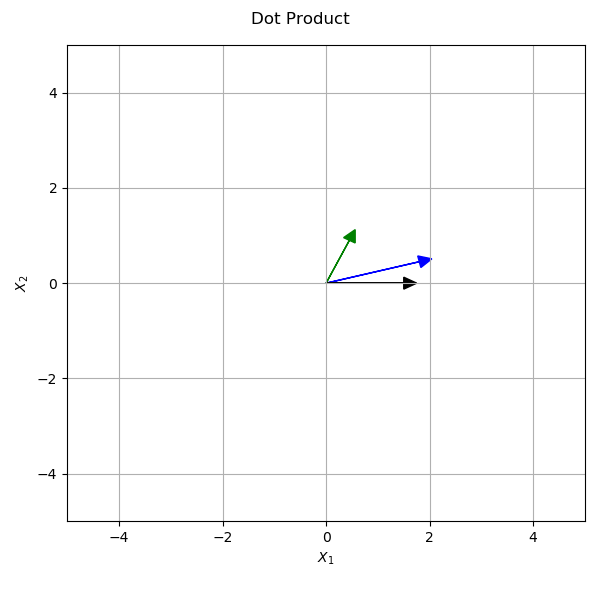

interactive(children=(FloatSlider(value=1.0, description='v1', max=5.0, min=-5.0), FloatSlider(value=2.0, desc…

In [162]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(6, 6)

@interact(v1=(-5,5,0.1), v2=(-5,5,0.1), w1=(-5,5,0.1), w2=(-5,5,0.1))
def update(v1=1, v2=2, w1=2, w2=0.5):
    v, w = numpy.array([v1, v2]), numpy.array([w1, w2])
    ax.cla()
    ax.arrow(0, 0, v1*0.9, v2*0.9, head_width=0.25, head_length=0.25, fc='g', ec='g')
    ax.arrow(0, 0, w1*0.9, w2*0.9, head_width=0.25, head_length=0.25, fc='b', ec='b')
    ax.arrow(0, 0, v1*w1+v2*w2, 0, head_width=0.25, head_length=0.25, fc='k', ec='k')
    fig.canvas.draw_idle()
    ax.set_xlim(-5, 5);ax.set_ylim(-5, 5)
    ax.set_xlabel('$X_1$');ax.set_ylabel('$X_2$')
    plt.suptitle('Dot Product')
    ax.grid(True)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Cauchy–Schwarz Inequality
$$ \cfrac{|\vec{V} \cdot \vec{U}|}{|\vec{V}| \: |\vec{U}|} \leq 1 $$

+ Bounds the output of Dot product
 + Shows something about direction
+ Basic to show
  + Applications everywhere

+ What does equality mean?

+ What if 2 vectors are opposite directions?







$$ \hat{V} = \cfrac{\vec{V}}{|\vec{V}|} \quad |\hat{V}| = 1 \quad \quad
\hat{U} = \cfrac{\vec{U}}{|\vec{U}|} \quad |\hat{U}| = 1 $$



$$ \hat{V} \cdot \hat{U} = cos(\theta) $$

$$ | \hat{V} \cdot \hat{U} | = |cos(\theta)| \leq 1 $$

$$ \left | \cfrac{\vec{V}}{|\vec{V}|} \cdot \cfrac{\vec{U}}{|\vec{U}|} \right| \leq 1 \quad  \xrightarrow[]{} \quad \cfrac{|\vec{V} \cdot \vec{U}|}{|\vec{V}| \: |\vec{U}|} \leq 1  $$

### Matched Filter
Maxmize the Signal to Noise Ratio

#### Cauchy–Schwarz Inequality
Tells us the maximum we can get is 1



$$ \begin{align}
\cfrac{|\vec{V} \cdot \vec{U}|}{|\vec{V}| \: |\vec{U}|} &\leq 1 \\
{|\hat{V} \cdot \hat{U}|} &\leq 1 \\
{|\hat{V} \cdot \hat{U}|} &= 1 
\end{align}$$

#### What can be infered about $\vec{V}$ and $\vec{U}$

+  $\vec{V}$ and $\vec{U}$

### Convolution
$$ \begin{align} (f*g)(t) &= \int_{-\infty}^{t} f(\tau)\: g(t-\tau) \: d \tau \\
(f*g)[n] &= \sum_{-\infty\dots \infty}^{i}  f[i]\:g[n-i]  \end{align}$$

<img src="rect_rect_conv.gif?0" width="100%">

<img src="rect_rect_conv_auto.gif" width="100%">

<img src="rect_fat_rect_conv_auto.gif" width="100%">

<img src="rect_exp_conv_auto.gif" width="100%">

<img src="exp_exp_conv_auto.gif" width="100%">

<img src="rect_gaussian_conv_auto.gif" width="100%">

<img src="gaussian_gaussian_conv_auto.gif" width="100%">

<img src="rect_rect_conv.gif?0" width="100%">

<img src="rect_exp_conv.gif" width="90%">

### Matrix Operations

+ Scalar Matrix multiplication

+ Addition and Subtraction

+ Matrix Multiplication

+ Matrix Inverse

+ Matrix Decompositions

#### Scalar Matrix Multiplication

#### Addition and Subtraction

#### Matrix Multiplication

#### Matrix Inverse

#### Matrix Decompositions

### Multivariate Random Variables

#### Guassian
$$ \begin{align} \mathcal{N} \left ( \bf \mu , \bf \Sigma \right ) 
&= {\left ( \sqrt{ \left ( 2 \pi \right ) ^{k} \bf |\Sigma| } \right ) }^{-1} {e^{
- \cfrac{\left ( \left ( x-\mu \right )^{T} \Sigma ^ {-1}  \left ( x-\mu \right ) \right )} {2}
} }
\end{align}
$$

#### Complex Guassian
$$ \begin{align} \mathcal{CN} \left ( \bf \mu , \bf \Sigma \right ) 
&= {\left ( { \left ( 2 \pi \right ) ^{k} \bf |\Sigma| } \right ) }^{-1} {e^{
- \cfrac{\left ( \left ( x-\mu \right )^{T} \Sigma ^ {-1}  \left ( x-\mu \right ) \right )} {2}
} }
\end{align}
$$

#### Zero Mean Unit Variance

$$ \begin{align} \mathcal{N} \left ( \bf 0 , \bf 1 \right ) 
&= {\left ( \sqrt{ \left ( 2 \pi \right ) ^{k} \bf } \right ) }^{-1} {e^{
- \left ( \cfrac{  x^{T} x } {2} \right )
} }
\end{align}
$$

#### Complex Zero Mean Unit Variance

$$ \begin{align} \mathcal{CN} \left ( \bf 0 , \bf 1 \right ) 
&= { { \left ( 2 \pi \right ) ^{-k} \bf } } {e^{
- \left ( \cfrac{  x^{T} x } {2} \right )
} }
\end{align}
$$

### Correlation of random vectors


### Orthogonal + Normal = Orthonormal


### Inverse


### Decomposistions


## Frequency / Tone
 + Real valued
 + Matched Filter Real valued
 + Phase
 + Complex Samples

## Real Valued Signal

$$ tone(t) = sin(2\pi f t -\phi) $$

+ f is frequency in 1 over peroid
  + $\omega$ angular frequency in radians per peroid
  + $\omega = 2 \pi f $
+ $\phi$ is the phase




<img src="sine_wave.gif" width="100%">

<img src="matched_filter_phase_1.gif?0" width="90%">

<img src="matched_filter_IQ.gif" width="90%">

+ Two Filters
+ Note the amplitude 
  + Peak is 1
  + The Filter magnitude is 1/2
  + Root Mean Square is $\sqrt{1/2}$

### 2 Perpendicular Axis

+ Real Valued Tones require a pair of matched filters
  + Two filters are orthogonal


#### Direct Conversion

  + Where complex numbers principally come from for signal processing

$$ I = Signal(t) \cdot cos(\omega t), \quad Q = Signal(t) \cdot sin(\omega t)$$

###### Euler's Equation

$$ e^{ix} = cos(x) + i\:sin(x) \quad where \;\; i=\sqrt{-1}$$

See Taylor Expansion for proof

$$ \mathcal{z} = Signal(t)\cdot ctone(t) $$

$$ \begin{align}ctone(t) &= { e^{i 2 \pi f t + \phi} } \\
&=  cos(2\pi f t -\phi) + i\: sin(2\pi f t -\phi)
\end{align}
$$

## Complex Number

$$ Z = a + i\: b $$

  + Operations
  + Relationship between Phase and Delay
  + Negative Frequencies?
  + Direct-conversion receiver
  + Complex Random Numbers

### Complex Number Operations
#### Magnitude and Phase
$$ |Z| = \sqrt{ {\Re(Z)}^2 + {\Im(Z)}^2} $$
$$ \angle Z = \phi = {tan}^{-1}  \left (\cfrac{\Im(Z)}{\Re(Z)}\right)$$


#### Addition 
Just like vector addition
$$ Z + Y = \left ( \Re({Z}) + \Re({Y}) \right ) + i \left ( \Im({Z}) + \Im({Y}) \right ) $$


#### Subtraction
Just like vector addition and scalar multiplication
$$ \begin{align*}
   Z - Y  & = Z + (-1 \cdot Y ) \\
          & = \left ( \Re({Z}) - \Re({Y}) \right ) + i \left ( \Im({Z}) - \Im({Y}) \right ) 
\end{align*}
$$

#### Multiplication
Rotation and scaling, not vector product
$$ Z \cdot Y = (\Re(Z) \Re(Y) - \Im(Z) \Im(Y)) + i(\Re(Z) \Im(Y) + \Im(Z) \Re(Y))$$

#### Multiplication Magnitude and Angle
$$ Z \cdot Y = |Z| |Y|\angle \left ( \angle Z + \angle Y\right )$$


### Complex Number Operations



#### Conjugation

$$ Z^* = \Re(Z) - i\: \Im(Z) $$

#### Division

$$ \cfrac{Z}{Y} = \cfrac{|Z|}{|Y|}\angle \left ( \angle Z - \angle Y \right )  $$

##### Real Powers
$$ Z^n = |Z|^{n} \angle \left ( n \: \angle Z \right ) $$
##### Complex Powers
$$ Z^\alpha =  \cdots \cdots $$

### Delay and Phase

$$ \begin{align}ctone(t) &= { e^{i 2 \pi f t + \phi} } \\
&= { e^{i 2 \pi f \left (t + \cfrac{\phi}{2 \pi f} \right ) }  }
\end{align}
$$

Observe $\cfrac{\phi}{2 \pi f}$ is like time.

$$ t = \cfrac{\phi}{2 \pi f} $$

### Negative Frequencies

#### Real

$$ tone(t) = sin(2\pi f \: t - \phi ) $$


+ What happens if $f$ is negative?


+ Recall the matched filter animation

<img src="sine_wave.gif" width="100%">

<img src="matched_filter_IQ.gif" width="90%">

### Negative Frequencies

#### Complex

$$ ctone(t) &= { e^{i 2 \pi f t + \phi} }  $$


+ What happens if $f$ is negative?



  + Basic Math Operations
    + Linearity
    + Time Inverance 
    + Bounded Input Bounded Output
    + Dirivatives and Differences
    + Integrates and Sumations 
    + Useful Non-linear Functions
      + ABS
      + Squared
      + Log and Decibels
    
  + Continous Vs. Descrete Signals
    + Analog to Digital Conversion
    + Digital to Analog Conversion
    + Delta Symbol
    + Nyquest Sampling
    
  + Random Varaibles
    + Basics of Probablilty
      + Probability Density Function
      + Total Probablilty
      + Cumulative Distribution Function
    + Continuous Vs. Discrete
    + Common Distributions
      + Uniform
      + Exponential
      + Gaussian
      + Chi Squared
    + Independent and identically Distributed Random Variables
    + Operations on random variables
    + Central Limit Theorem
    + Correlation
    
  + Basic Linear Algebra
    + Vector Operations
      + Addition
      + Scaler Multiplication
      + Vector Span
    + Vector Products
      + Elementwise Product
      + Outter Product
      + Inner Product
    + Matrix Operations
    + Cauchy–Schwarz inequality
    + Matched Filter
    + Convolution
    + Correlation of random vectors
    + Rotation Matrices
    + 
    
  + Frequency / Tone
    + Real valued
    + Matched Filter Real valued
    + Phase
    + Complex Samples
    
  + Complex Number
    + Direct-conversion receiver
    + Negative Frequencies?
    + Relationship between Phase and Delay
    + Complex Random Numbers
  